In [1]:
# IMPORTS
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize, rescale, rotate
from skimage import exposure

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

import warnings

In [10]:
# define function for visualization of learning curves:
def learning_curves(hist_name, loss_key, validation_loss_key, accuracy_key, validation_accuracy_key,
                    loss_range=(0,1), metric_range=(0,1)):
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(hist_name.history[loss_key], label=loss_key) #loss is training loss
    plt.plot(hist_name.history[validation_loss_key], label=validation_loss_key) #val_loss is validation loss
    plt.plot(np.argmin(hist_name.history[validation_loss_key]),
    np.min(hist_name.history[validation_loss_key]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.ylim(loss_range)

    plt.legend();
    print(hist_name.history.keys())
    print("Training accuracy", hist_name.history[accuracy_key][-1])
    print("Validation accuracy", hist_name.history[validation_accuracy_key][-1])
    plt.show()

    # plotting accuracy curves
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(hist_name.history[accuracy_key], label=accuracy_key) # training accuracy
    plt.plot(hist_name.history[validation_accuracy_key], label=validation_accuracy_key) # validation accuracy
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(metric_range)
    return 

## Task3a) Read the following set of codes and find out how they work. Then, change the following parameters: scale_factor, Angle, low/high bounds to see their effects.

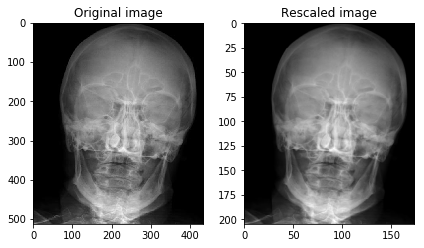

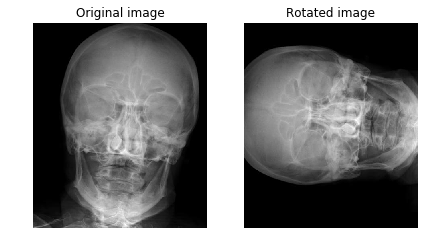

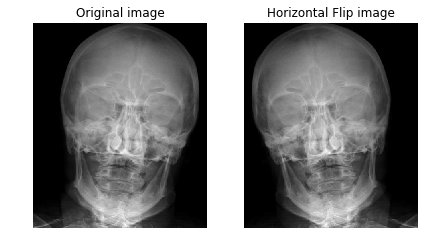

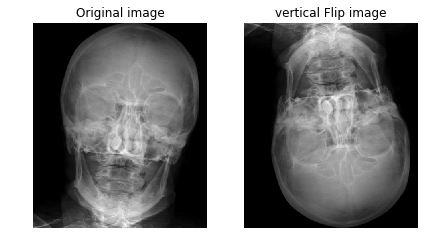

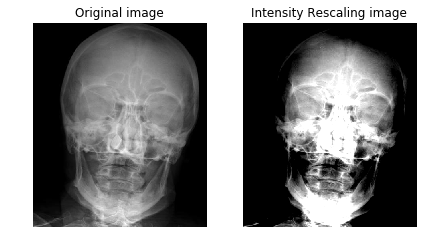

In [2]:
warnings.filterwarnings("ignore")
sample_dir = '/DL_course_data/Lab1/X_ray/train/C4_4662.jpg'
img = imread(sample_dir)
row, col = img.shape
def show_paired(Original, Transform, Operation):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")
    ax[1].imshow(Transform, cmap='gray')
    ax[1].set_title(Operation + " image")
    if Operation == "Rescaled":
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else: 
        ax[0].axis('off')
        ax[1].axis('off')
    plt.tight_layout()
    
# Scaling
scale_factor = 0.4
image_rescaled = rescale(img, scale_factor)
show_paired(img, image_rescaled, "Rescaled")

# Roation
angle = 90
image_rotated = rotate(img, angle)
show_paired(img, image_rotated, "Rotated")

# Horizontal Flip
horizontal_flip = img[:, ::-1]
show_paired(img, horizontal_flip, 'Horizontal Flip')

# Vertical Flip
vertical_flip = img[::-1, :]
show_paired(img, vertical_flip, 'vertical Flip')

# Intensity rescaling
low_bound, high_boud = 50, 90
min_val, max_val = np.percentile(img, (low_bound, high_boud))
better_contrast = exposure.rescale_intensity(img, in_range=(min_val, max_val))
show_paired(img, better_contrast, 'Intensity Rescaling')

- Rescaling: Rescaling the image resolution with respect to the original resolution
- Rotation: Rotating the image with a specified angle in degrees
- Horizontal flip: Flipping image horizontally 
- Vertical flip: Fliiping image vertically
- Intensity rescaling: Rescales intensity values, so that the lower percentile is mapped onto 0% while the upper percentile is mapped to 100%


## Task3b) A practical way to perform the data augmentation technique is to develop a generator. The following code is an example of how you can generate augmented images randomly with a TensorFlow built-in generator.

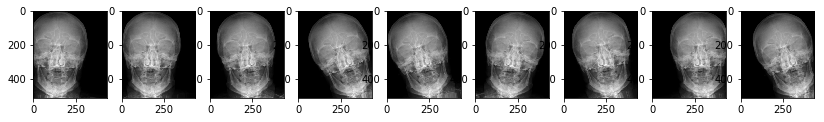

In [3]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Sample = '/DL_course_data/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)
count = 8
my_gen = ImageDataGenerator(rotation_range = 20,
                         width_shift_range = 0.2,
                         horizontal_flip = True)
fix, ax = plt.subplots(1,count+1, figsize=(14,2)) 
images_flow = my_gen.flow(Img, batch_size=1)

for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True) 
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break

## Task4) Develop a framework for training the models with augmenting the training data as:

In [6]:
# 1)Import required libraries ..
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize, rescale, rotate
from skimage import exposure

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

import matplotlib.pyplot as plt

import warnings

# 2) set the directory to the data and model parameters like:
train_dir = '/DL_course_data/Lab2/Skin/train/'
val_dir = '/DL_course_data/Lab2/Skin/validation/' 

img_width = 128
img_height = 128
img_ch = 1

batch_size = 8
learning_rate = 0.00001
base = 64
dropout_rate = 0.4
epochs=80

# augmentation parameters:
rotation_range=10
width_shift_range=0.1
height_shift_range=0.1
rescale=1./255
horizontal_flip=True

# 3)Model architecture like:
def AlexNet(img_ch, img_width, img_height, base, dropout_rate):
    
    model = Sequential()
    
    model.add(Conv2D(filters=base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dropout(dropout_rate))
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Dropout(dropout_rate))
    model.add(Activation('relu'))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

# 4)Set train data generator like:
train_datagen = ImageDataGenerator(rotation_range = rotation_range,
                                   width_shift_range=width_shift_range,
                                   height_shift_range=height_shift_range,
                                   rescale=rescale,
                                   horizontal_flip=horizontal_flip
                                    )
# 5)Compile the train generator over the training directory:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    color_mode='grayscale',
                                                    classes=['Nevi', 'Mel'],
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    subset=None,
                                                    interpolation='bilinear'
                                                    )

# 6)Set and compile the validation generator like:
val_datagen = ImageDataGenerator(rescale=rescale)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                color_mode='grayscale',
                                                classes=['Nevi', 'Mel']
                                                class_mode='categorical',
                                                batch_size=batch_size,
                                                shuffle=True,
                                                subset=None,
                                                interpolation='bilinear'
                                               ) 

# 7)Compile the model like:
my_model = AlexNet(img_ch, img_width, img_height, base, dropout_rate)
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]
                )

# 8)Training the model like:
model_hist = my_model.fit(train_generator,
                          validation_data=val_generator,
                          epochs=epochs,
                          batch_size=batch_size,
                          verbose=1,
                          shuffle=False
                         ) 
# 9)Learning curve plots

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization_v2_10 (B (None, 128, 128, 64)      256       
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_v2_11 (B (None, 64, 64, 128)       512       
_____________________________________

Epoch 79/80
125/125 [==============================] - 5s 43ms/step - loss: 0.4349 - binary_accuracy: 0.8020 - val_loss: 0.4196 - val_binary_accuracy: 0.8350
Epoch 80/80
125/125 [==============================] - 5s 42ms/step - loss: 0.4508 - binary_accuracy: 0.8000 - val_loss: 0.3878 - val_binary_accuracy: 0.8350


dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])
Training accuracy 0.8
Validation accuracy 0.835


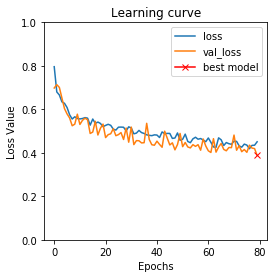

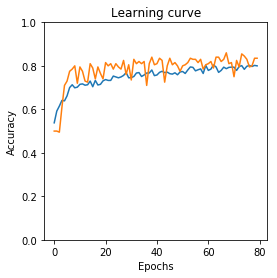

In [11]:
# visualize learning curves:
loss_key = 'loss'
val_loss_key = 'val_loss'
accuracy_key = 'binary_accuracy'
val_accuracy_key = 'val_binary_accuracy'
learning_curves(model_hist, loss_key, val_loss_key, accuracy_key, val_accuracy_key)

### How does the data augmentation impact model training? Why?

When using the data augmentation, overfitting is reduced because the model has more training data. 

In [9]:
# defining VGG16
def VGG16(img_ch, img_width, img_height, base, dropout_rate):
    
    model = Sequential()
    
    model.add(Conv2D(filters=base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=2*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=2*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    
    
    model.add(Conv2D(filters=4*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=4*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=4*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters=8*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))  

    
    model.add(Conv2D(filters=8*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8*base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2))) 
    

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dropout(dropout_rate))
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

In [12]:
# Compile VGG16 for Skin classification:
VGG16_skin = VGG16(img_ch, img_width, img_height, base, dropout_rate)
VGG16_skin.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]
                )

# 8)Training the model like:
VGG16_skin_hist = VGG16_skin.fit(train_generator,
                          validation_data=val_generator,
                          epochs=epochs,
                          batch_size=batch_size,
                          verbose=1,
                          shuffle=False
                         ) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
activation_24 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_25 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
activation_26 (Activation)   (None, 64, 64, 128)      

Epoch 69/80
125/125 [==============================] - 5s 44ms/step - loss: 0.4557 - binary_accuracy: 0.7840 - val_loss: 0.5011 - val_binary_accuracy: 0.7900
Epoch 70/80
125/125 [==============================] - 6s 44ms/step - loss: 0.4588 - binary_accuracy: 0.7970 - val_loss: 0.4860 - val_binary_accuracy: 0.7600
Epoch 71/80
125/125 [==============================] - 5s 44ms/step - loss: 0.4478 - binary_accuracy: 0.8010 - val_loss: 0.4584 - val_binary_accuracy: 0.8000
Epoch 72/80
125/125 [==============================] - 6s 44ms/step - loss: 0.4444 - binary_accuracy: 0.8030 - val_loss: 0.4504 - val_binary_accuracy: 0.8200
Epoch 73/80
125/125 [==============================] - 5s 44ms/step - loss: 0.4395 - binary_accuracy: 0.8020 - val_loss: 0.4714 - val_binary_accuracy: 0.7850
Epoch 74/80
125/125 [==============================] - 5s 44ms/step - loss: 0.4344 - binary_accuracy: 0.8000 - val_loss: 0.4445 - val_binary_accuracy: 0.8250
Epoch 75/80
125/125 [==============================]

dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])
Training accuracy 0.8
Validation accuracy 0.83


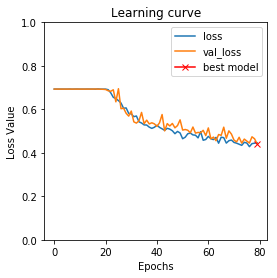

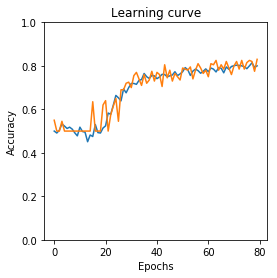

In [13]:
# 9)Learning curve plots
learning_curves(VGG16_skin_hist, loss_key, val_loss_key, accuracy_key, val_accuracy_key)

In [16]:
train_dirr = '/DL_course_data/Lab2/Bone/train/'
val_dir = '/DL_course_data/Lab2/Bone/validation/' 
train_datagen_bone = ImageDataGenerator(rotation_range = rotation_range,
                                   width_shift_range=width_shift_range,
                                   height_shift_range=height_shift_range,
                                   rescale=rescale,
                                   horizontal_flip=horizontal_flip
                                    )
# 5)Compile the train generator over the training directory:
train_generator_bone = train_datagen_bone.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    color_mode='grayscale',
                                                    classes=['AFF', 'NFF'],
                                                    class_mode='binary',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    subset=None,
                                                    interpolation='bilinear'
                                                    )

# 6)Set and compile the validation generator like:
val_datagen_bone = ImageDataGenerator(rescale=rescale)
val_generator_bone = val_datagen_bone.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                color_mode='grayscale',
                                                classes=['AFF', 'NFF'],
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle=True,
                                                subset=None,
                                                interpolation='bilinear'
                                               ) 

# 7)Compile the model like:
VGG16_bone = VGG16(img_ch, img_width, img_height, base, dropout_rate)
VGG16_bone.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]
                )

# 8)Training the model like:
VGG16_bone_hist = VGG16_bone.fit(train_generator,
                          validation_data=val_generator,
                          epochs=epochs,
                          batch_size=batch_size,
                          verbose=1,
                          shuffle=False
                         ) 
# 9)Learning curve plots

Found 0 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
activation_40 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_41 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________

Epoch 17/80
125/125 [==============================] - 5s 44ms/step - loss: 0.6388 - binary_accuracy: 0.6480 - val_loss: 0.6122 - val_binary_accuracy: 0.7300
Epoch 18/80
125/125 [==============================] - 5s 44ms/step - loss: 0.6071 - binary_accuracy: 0.6930 - val_loss: 0.5565 - val_binary_accuracy: 0.7950
Epoch 19/80
125/125 [==============================] - 5s 44ms/step - loss: 0.6060 - binary_accuracy: 0.6730 - val_loss: 0.5381 - val_binary_accuracy: 0.7850
Epoch 20/80
125/125 [==============================] - 5s 44ms/step - loss: 0.5827 - binary_accuracy: 0.7170 - val_loss: 0.5512 - val_binary_accuracy: 0.8000
Epoch 21/80
125/125 [==============================] - 5s 44ms/step - loss: 0.5693 - binary_accuracy: 0.7220 - val_loss: 0.5668 - val_binary_accuracy: 0.8050
Epoch 22/80
125/125 [==============================] - 5s 43ms/step - loss: 0.5439 - binary_accuracy: 0.7490 - val_loss: 0.5281 - val_binary_accuracy: 0.7600
Epoch 23/80
125/125 [==============================]

Epoch 69/80
125/125 [==============================] - 5s 43ms/step - loss: 0.4595 - binary_accuracy: 0.8060 - val_loss: 0.4511 - val_binary_accuracy: 0.8250
Epoch 70/80
125/125 [==============================] - 6s 44ms/step - loss: 0.4475 - binary_accuracy: 0.8060 - val_loss: 0.4513 - val_binary_accuracy: 0.8400
Epoch 71/80
125/125 [==============================] - 5s 44ms/step - loss: 0.4229 - binary_accuracy: 0.8090 - val_loss: 0.4721 - val_binary_accuracy: 0.8200
Epoch 72/80
125/125 [==============================] - 5s 44ms/step - loss: 0.4401 - binary_accuracy: 0.8030 - val_loss: 0.4500 - val_binary_accuracy: 0.8100
Epoch 73/80
125/125 [==============================] - 6s 45ms/step - loss: 0.4508 - binary_accuracy: 0.7910 - val_loss: 0.4559 - val_binary_accuracy: 0.8150
Epoch 74/80
125/125 [==============================] - 5s 43ms/step - loss: 0.4406 - binary_accuracy: 0.8010 - val_loss: 0.4579 - val_binary_accuracy: 0.7950
Epoch 75/80
125/125 [==============================]

dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])
Training accuracy 0.807
Validation accuracy 0.78


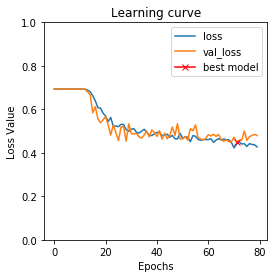

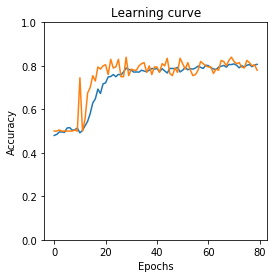

In [17]:
# Learning curve plots
learning_curves(VGG16_bone_hist, loss_key, val_loss_key, accuracy_key, val_accuracy_key)

## Task6) In this task, you will employ a pre-trained VGG16 model that was trained on the ImageNet database. By fine-tuning this model, you will classify the skin and bone data set again. To do so, as the first step, the pre-trained model should be loaded. This pretarined model will be used as a feature extractor model. In other words, training and validation data should be passed through the layers of the pre-trained VGG network, and the output of last convolutional block will be used as the extracted features. These features, then, are fed, to the new layer(s) in a way that only the new added layer(s) will be trained. Follow the code and complete it as:

In [18]:
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications

In [56]:
def get_length(Path, Pattern):
    # Pattern: name of the subdirectory
    Length = len(os.listdir(os.path.join(Path, Pattern)))
    return Length
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1000, activation='softmax'))
    model.summary()

### Load bone data

In [127]:
# parameters (TODO)
train_data_dir = '/DL_course_data/Lab2/Bone/train/'
validation_data_dir = '/DL_course_data/Lab2/Bone/validation/'
img_width, img_height = (244,244)
epochs = 150
batch_size = 8
LR = 0.00001

# number of data for each class
Len_C1_Train = get_length(train_data_dir,'AFF')
Len_C2_Train = get_length(train_data_dir,'NFF')
Len_C1_Val = get_length(validation_data_dir,'AFF')
Len_C2_Val = get_length(validation_data_dir,'NFF')

### load pretrained VGG16

In [128]:
# loading the pre-trained model
# include top: false means that the dense layers at the top of the network will not be used.
model = applications.VGG16(include_top=False, weights='imagenet')
model.trainable = False
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Use pretrained VGG16 for feature extraction from bone dataset

In [129]:
# Feature extraction from pretrained VGG (training data)
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

# Extracting the features from the loaded images
features_train = model.predict_generator(
    train_generator,
    (Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)

# To DO: Feature extraction from pretrained VGG (validation data)
validation_generator = datagen.flow_from_directory(
                                                    validation_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode=None,
                                                    shuffle=False)

# Extracting the features from the loaded images
features_validation = model.predict_generator(
    validation_generator,
    (Len_C1_Val+Len_C2_Val) // batch_size, max_queue_size=1, verbose=1)

# training a small MLP with extracted features from the pre-trained model
# In fact this MLP will be used instead of the dense layers of the VGG model
# and only this MLP will be trained on the dataset.
train_data = features_train
train_labels = np.array([0] * int(Len_C1_Train) + [1] * int(Len_C2_Train))
validation_data = features_validation
validation_labels = np.array([0] * int(Len_C1_Val) + [1] * int(Len_C2_Val))


Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
12/12 [==============================] - 5s 455ms/step


### training classifier on bone dataset

In [130]:
# TODO: Building the MLP model
def MLP():
    model = Sequential()
    model.add(Flatten(input_shape= (7,7,512) ))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

# TODO: Compile and train the model, plot learning curves
clf_bone = MLP()
clf_bone.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]
                )                
clf_bone_hist = clf_bone.fit(x=train_data,
             y=train_labels,
              validation_data=(validation_data, validation_labels),
              epochs=epochs,
              batch_size=batch_size,
              verbose=1,
              shuffle=True
                         ) 


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 129       
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________
Train on 1112 samples, validate on 96 samples
Epoch 1/150
1112/1112 [==============================] - 1s 659us/sample - loss: 0.6364 - binary_accuracy: 0.6340 - val_loss: 0.5507 - val_binary_accuracy: 0.7396
Epoch 2/150
1112/1112 [=========

Epoch 95/150
1112/1112 [==============================] - 1s 475us/sample - loss: 9.3038e-04 - binary_accuracy: 1.0000 - val_loss: 0.0108 - val_binary_accuracy: 0.9896
Epoch 96/150
1112/1112 [==============================] - 1s 469us/sample - loss: 6.4970e-04 - binary_accuracy: 1.0000 - val_loss: 0.0109 - val_binary_accuracy: 0.9896
Epoch 97/150
1112/1112 [==============================] - 1s 477us/sample - loss: 6.7274e-04 - binary_accuracy: 1.0000 - val_loss: 0.0105 - val_binary_accuracy: 0.9896
Epoch 98/150
1112/1112 [==============================] - 1s 466us/sample - loss: 4.7762e-04 - binary_accuracy: 1.0000 - val_loss: 0.0159 - val_binary_accuracy: 0.9896
Epoch 99/150
1112/1112 [==============================] - 1s 474us/sample - loss: 6.6646e-04 - binary_accuracy: 1.0000 - val_loss: 0.0186 - val_binary_accuracy: 0.9896
Epoch 100/150
1112/1112 [==============================] - 1s 462us/sample - loss: 5.3083e-04 - binary_accuracy: 1.0000 - val_loss: 0.0116 - val_binary_accuracy

dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])
Training accuracy 1.0
Validation accuracy 0.9895833


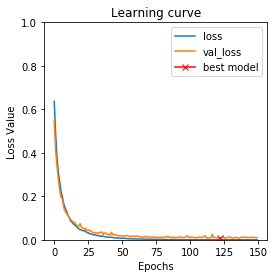

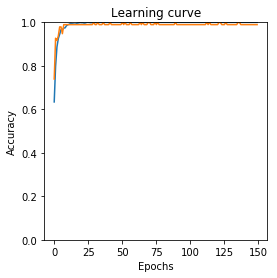

In [131]:
# Learning curve plots
learning_curves(clf_bone_hist, loss_key, val_loss_key, accuracy_key, val_accuracy_key)

### Merging pretrained VGG and trained classifier

In [132]:
# combining pretrained models
def VGG_fine_tuned(base_model, head):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    model = base_model(inputs)
    output = head(model)
    
    clf = Model(inputs=inputs, outputs=output)
    clf.summary
    return clf

clf_bone_tuned = VGG_fine_tuned(model, clf_bone)
clf_bone_tuned.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
sequential_20 (Sequential)   (None, 1)                 3211521   
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [133]:
# testing fine tuned model:
datagen = ImageDataGenerator(rescale=1. / 255)
val_generator_bone = datagen.flow_from_directory(validation_data_dir,
                                                target_size=(224, 224),
                                                #color_mode='grayscale',
                                                classes=['AFF', 'NFF'],
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle=False,
                                               ) 
validation_labels = np.array([0] * int(Len_C1_Val) + [1] * int(Len_C2_Val))


predictions = clf_bone_tuned.predict_generator(val_generator_bone, (Len_C1_Val+Len_C2_Val) // batch_size)
predictions = np.array([1 if x>0.5 else 0 for x in predictions])
print('accuracy = ', np.sum(validation_labels==predictions)/len(predictions))
print(predictions)

Found 96 images belonging to 2 classes.
accuracy =  1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Now fine tune model for skin dataset

In [135]:
# parameters (TODO)
train_data_dir_skin = '/DL_course_data/Lab2/Skin/train/'
validation_data_dir_skin = '/DL_course_data/Lab2/Skin/validation/'
img_width, img_height = (244,244)
epochs = 150
batch_size = 8
LR = 0.00001

# number of data for each class
Len_C1_Train_skin = get_length(train_data_dir_skin,'Mel')
Len_C2_Train_skin = get_length(train_data_dir_skin,'Nevi')
Len_C1_Val_skin = get_length(validation_data_dir_skin,'Mel')
Len_C2_Val_skin = get_length(validation_data_dir_skin,'Nevi')

In [136]:
## Fine tune preloaded VGG16 on bone dataset 
# Feature extraction from pretrained VGG (training data)
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator_skin = datagen.flow_from_directory(
    train_data_dir_skin,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

# Extracting the features from the loaded images
features_train_skin = model.predict_generator(
    train_generator_skin,
    (Len_C1_Train_skin+Len_C2_Train_skin) // batch_size, max_queue_size=1)

# To DO: Feature extraction from pretrained VGG (validation data)
validation_generator_skin = datagen.flow_from_directory(
                                                    validation_data_dir_skin,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode=None,
                                                    shuffle=False)

# Extracting the features from the loaded images
features_validation_skin = model.predict_generator(
    validation_generator_skin,
    (Len_C1_Val_skin+Len_C2_Val_skin) // batch_size, max_queue_size=1, verbose=1)

# training a small MLP with extracted features from the pre-trained model
# In fact this MLP will be used instead of the dense layers of the VGG model
# and only this MLP will be trained on the dataset.
train_data_skin = features_train_skin
train_labels_skin = np.array([0] * int(Len_C1_Train_skin) + [1] * int(Len_C2_Train_skin))
validation_data_skin = features_validation_skin
validation_labels_skin = np.array([0] * int(Len_C1_Val_skin) + [1] * int(Len_C2_Val_skin))

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
25/25 [==============================] - 1s 52ms/step


### train classifier on skin dataset 

In [137]:
clf_skin = MLP()
clf_skin.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]
                )                
clf_skin_hist = clf_skin.fit(x=train_data_skin,
             y=train_labels_skin,
              validation_data=(validation_data_skin, validation_labels_skin),
              epochs=epochs,
              batch_size=batch_size,
              verbose=1,
              shuffle=True
                         ) 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 129       
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 200 samples
Epoch 1/150
1000/1000 [==============================] - 1s 700us/sample - loss: 0.6466 - binary_accuracy: 0.6170 - val_loss: 0.5518 - val_binary_accuracy: 0.7850
Epoch 2/150
1000/1000 [========

1000/1000 [==============================] - 0s 494us/sample - loss: 0.1363 - binary_accuracy: 0.9590 - val_loss: 0.3374 - val_binary_accuracy: 0.8450
Epoch 96/150
1000/1000 [==============================] - 1s 505us/sample - loss: 0.1290 - binary_accuracy: 0.9630 - val_loss: 0.3491 - val_binary_accuracy: 0.8350
Epoch 97/150
1000/1000 [==============================] - 1s 500us/sample - loss: 0.1325 - binary_accuracy: 0.9550 - val_loss: 0.3432 - val_binary_accuracy: 0.8400
Epoch 98/150
1000/1000 [==============================] - 0s 492us/sample - loss: 0.1330 - binary_accuracy: 0.9610 - val_loss: 0.3617 - val_binary_accuracy: 0.8400
Epoch 99/150
1000/1000 [==============================] - 1s 502us/sample - loss: 0.1292 - binary_accuracy: 0.9660 - val_loss: 0.3587 - val_binary_accuracy: 0.8350
Epoch 100/150
1000/1000 [==============================] - 0s 494us/sample - loss: 0.1267 - binary_accuracy: 0.9570 - val_loss: 0.3418 - val_binary_accuracy: 0.8600
Epoch 101/150
1000/1000 [===

Epoch 145/150
1000/1000 [==============================] - 0s 489us/sample - loss: 0.0803 - binary_accuracy: 0.9820 - val_loss: 0.3650 - val_binary_accuracy: 0.8550
Epoch 146/150
1000/1000 [==============================] - 0s 498us/sample - loss: 0.0757 - binary_accuracy: 0.9860 - val_loss: 0.3855 - val_binary_accuracy: 0.8500
Epoch 147/150
1000/1000 [==============================] - 0s 497us/sample - loss: 0.0783 - binary_accuracy: 0.9830 - val_loss: 0.3696 - val_binary_accuracy: 0.8550
Epoch 148/150
1000/1000 [==============================] - 0s 488us/sample - loss: 0.0733 - binary_accuracy: 0.9850 - val_loss: 0.3687 - val_binary_accuracy: 0.8550
Epoch 149/150
1000/1000 [==============================] - 0s 491us/sample - loss: 0.0741 - binary_accuracy: 0.9860 - val_loss: 0.3852 - val_binary_accuracy: 0.8500
Epoch 150/150
1000/1000 [==============================] - 1s 509us/sample - loss: 0.0736 - binary_accuracy: 0.9840 - val_loss: 0.3787 - val_binary_accuracy: 0.8450


dict_keys(['val_binary_accuracy', 'val_loss', 'binary_accuracy', 'loss'])
Training accuracy 0.984
Validation accuracy 0.845


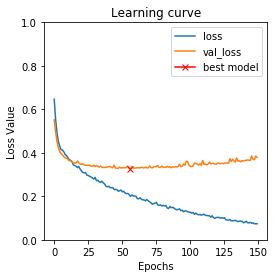

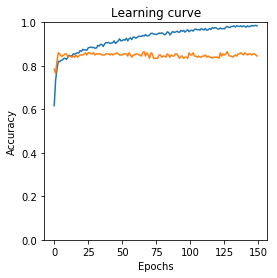

In [138]:
# Learning curve plots
learning_curves(clf_skin_hist, loss_key, val_loss_key, accuracy_key, val_accuracy_key)

In [139]:
# merge VGG16 with classifier
clf_skin_tuned = VGG_fine_tuned(model, clf_skin)
clf_skin_tuned.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
sequential_21 (Sequential)   (None, 1)                 3211521   
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [140]:
# testing fine tuned model on skin data:
datagen = ImageDataGenerator(rescale=1. / 255)
val_generator_skin = datagen.flow_from_directory(validation_data_dir_skin,
                                                target_size=(224, 224),
                                                class_mode='binary',
                                                batch_size=batch_size,
                                                shuffle=False,
                                                subset=None,
                                               ) 
validation_labels_skin = np.array([0] * int(Len_C1_Val_skin) + [1] * int(Len_C2_Val_skin))


predictions = clf_skin_tuned.predict_generator(val_generator_skin, (Len_C1_Val_skin+Len_C2_Val_skin) // batch_size)
predictions = np.array([1 if x>0.5 else 0 for x in predictions])
print('accuracy = ', np.sum(validation_labels_skin==predictions)/len(predictions))

Found 200 images belonging to 2 classes.
accuracy =  0.825


## Task7) Train the fine-tuned model with skin and bone images. Compare the observed results from transfer learning against the ones you already achieved by training the models from scratch. Describe how transfer learning would be useful for training. How can you make sure that the results are reliable?

Transfer learning using the pretrained VGG16 model works well on the bone dataset. After transfer learning, an validation accuracy of 1 could be achieved. Training the VGG on the bone dataset from scratch achieved a validation accuracy of 0.9 in comparision. 

Transfer learning using the pretrained VGG16 model on the skin dataset didn't work well. The learning curve is very steep in the beginning, but converges quite quickly. Furthermore, it diverged from the training accuracy, indicating overfitting. The transfer learning achieved a validation accuracy of 0.825 compared to ... in the model trained from skratch. 